<center><h1>Linear Regression</h1></center>

<center><h2>Coded by Anirudh Edpuganti</h2></center>
<center>CB.EN.U4AIE20005</center>

## Create a complete document on Linear Regression

### Model Representation

$$ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n + ε $$

where y is the predicted output variable. $ b_1 - b_n $ are the weights given to the input features $ x_1 - x_n $ respectively. b_0 is the intercept. \
So this lies in $ (n+1)^{th} $ dimensional space. \

The goal of linear regression is to find the values of the coefficients $ b_0 - b_n $ that minimize the difference between the predicted values $ (y) $ and the actual values $ (x_1 - x_n) $ of the target variable. This is typically done using a method called least squares, which minimizes the sum of the squared errors between the predicted values and the actual values.

### Cost Function

$$ L(b_0, b_1, ..., b_n) = \frac{1}{2m} \Sigma_{i=1}^{m} (\hat{y_i} - y_i)^2 $$

where m is the number of training examples \
$ \hat{y_i} $ is the predicted value of the target variable for the ith training example \
$ y_i $ is the actual value of the target variable for the ith training example

We try to minimize the cost function typically using an optimization algorithm such as gradient descent algorithm.

### Gradient descent algorithm

Gradient descent is an optimization algorithm used to minimize the cost function of a machine learning model. It is a first-order iterative optimization algorithm that works by iteratively adjusting the model parameters in the direction of the negative gradient of the cost function, until the minimum of the cost function is reached.

The basic idea of gradient descent is to start with an initial set of parameter values, and then repeatedly update the parameters in the direction of the steepest descent of the cost function. The direction of steepest descent is given by the negative gradient of the cost function with respect to the parameters. The gradient is a vector that points in the direction of the greatest increase of the cost function, so taking the negative of the gradient points in the direction of the greatest decrease of the cost function.

The algorithm works by iteratively updating the parameters according to the following rule:

$$ b = b - \alpha∇L(b) $$
$$ \Rightarrow b_j = b_j - \alpha \frac{\partial } {\partial b_j} L(b) $$
$$ \Rightarrow b_j = b_j - \frac{\alpha}{m} \Sigma_{i=1}^{m} [(\hat{y_i} - y_i)x_i] $$

where:

b is the vector of model parameters, the coefficients and intercept in the case of linear regression \
α is the learning rate, which controls the size of the step taken in the direction of the negative gradient \
∇L(b) is the gradient of the cost function with respect to the parameters b \
<br>
The algorithm continues to iterate until the parameters converge to a minimum of the cost function or a maximum number of iterations is reached.

### Python program for linear regression (single and multi-variable)

#### load a regression data of your choice

#### with and without (Gradient Descent) using an in-build python regression model


#### Train the model with 75% of total data and do the performance evaluation of the model using the remaining 25%(give the measures: MSE, RMSE, R^2, etc.)


#### Draw a performance plot of the regression model(% of training data vs RMSE)


In [96]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

##### Multi without Gradient Descent

In [98]:
# load the diabetes dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target
# print(X.shape)
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# print(diabetes.data)
# print(diabetes.target)

# fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the accuracy of the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy {accuracy:.2%}")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# Compute R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")


Accuracy 48.49%
RMSE: 53.37
MSE: 2848.31
R2 score: 0.48


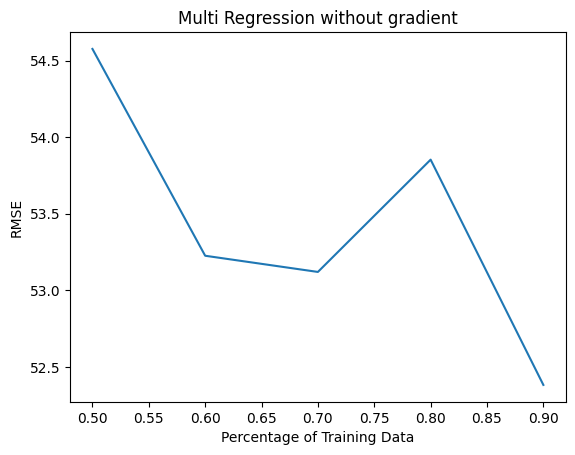

In [99]:
# Define the percentages of training data
train_percentages = [0.5, 0.6,0.7,0.8,0.9]

# Initialize an empty list to store the RMSE for each percentage
rmse_scores = []

# Loop over the percentages and fit the model
for train_percentage in train_percentages:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage, random_state=42)
    
    # Fit the linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the RMSE for this percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Plot the results
plt.plot(train_percentages, rmse_scores)
plt.xlabel('Percentage of Training Data')
plt.ylabel('RMSE')
plt.title('Multi Regression without gradient')
plt.show()

##### Multi with Gradient Descent

For prediction of y

$$ y = b_0 + b_1x_1 + ... + b_nx_n $$

For derivative wrt b (weight)

$$ \frac{dl}{db} = \frac{2}{m} \Sigma_{i=1}^{n} - (y_i - \hat{y_i})x_i $$

For derivative wrt b0 (intercept)

$$ \frac{dl}{db_0} = \frac{2}{m} \Sigma_{i=1}^{n} - (y_i - \hat{y_i}) $$

Update weight and intercept

$$ b = b - \alpha \frac{dl}{db} $$
$$ b0 = b0 - \alpha \frac{dl}{db_0} $$

In [100]:
b=np.random.randn(X.shape[1])
b0 = 0
lr = 0.01
epochs = 1000

def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product between weight and input
    return np.array(y_lst)

def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

for i in range(epochs):
     y_predicted = predicted_y(b,X_train,b0)
     b = b - lr *dldw(X_train,y_train,y_predicted)  #update weight
     b0 = b0 - lr * dldb(y_train,y_predicted)    #update bias

In [101]:
y_pred = np.dot(X_test, b) + b0

In [102]:
# Compute accuracy
accuracy = 1 - np.mean(np.abs(y_pred - y_test) / y_test)
print(f"Accuracy: {accuracy:.2%}")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# Compute R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")

Accuracy: 43.61%
RMSE: 73.53
MSE: 5405.94
R2 score: 0.12


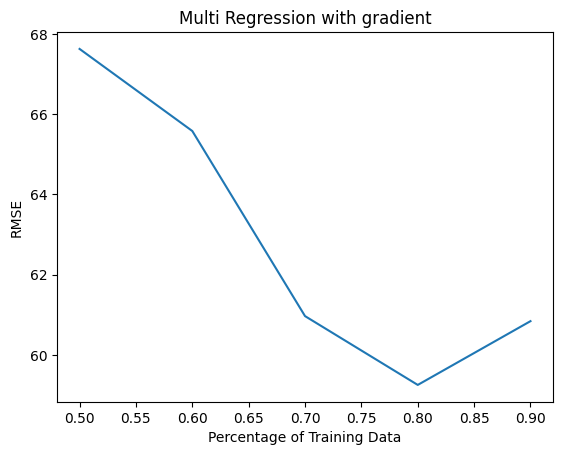

In [103]:
# Define the percentages of training data
train_percentages = [0.5, 0.6,0.7,0.8,0.9]

# Initialize an empty list to store the RMSE for each percentage
rmse_scores = []

# Loop over the percentages and fit the model
for train_percentage in train_percentages:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage, random_state=42)
    
    for i in range(epochs):
        y_predicted = predicted_y(b,X_train,b0)
        b = b - lr *dldw(X_train,y_train,y_predicted)  #update weight
        b0 = b0 - lr * dldb(y_train,y_predicted)  
    
    # Predict on the testing data
    y_pred = np.dot(X_test, b) + b0   
    
    # Calculate the RMSE for this percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Plot the results
plt.plot(train_percentages, rmse_scores)
plt.xlabel('Percentage of Training Data')
plt.ylabel('RMSE')
plt.title('Multi Regression with gradient')
plt.show()

##### Single without Gradient Descent

In [104]:
df = pd.read_csv("A:\#Amrita\Sem-6\DL\Assignments\Assignment-1\student_scores.csv")

X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


In [105]:
# Compute accuracy
accuracy = 1 - np.mean(np.abs(y_pred - y_test) / y_test)
print(f"Accuracy: {accuracy:.2%}")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# Compute R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")

Accuracy: 86.74%
RMSE: 5.51
MSE: 30.41
R2 score: 0.96


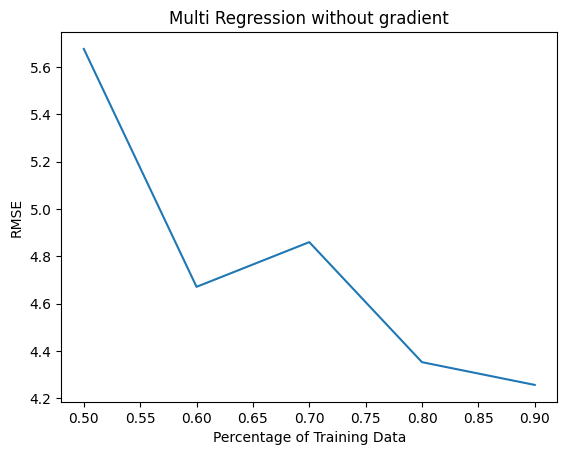

In [106]:
# Define the percentages of training data
train_percentages = [0.5, 0.6,0.7,0.8,0.9]

# Initialize an empty list to store the RMSE for each percentage
rmse_scores = []

# Loop over the percentages and fit the model
for train_percentage in train_percentages:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage, random_state=42)
    
    # Fit the linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the RMSE for this percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Plot the results
plt.plot(train_percentages, rmse_scores)
plt.xlabel('Percentage of Training Data')
plt.ylabel('RMSE')
plt.title('Multi Regression without gradient')
plt.show()

##### Single with Gradient Descent

In [107]:
df = pd.read_csv("A:\#Amrita\Sem-6\DL\Assignments\Assignment-1\student_scores.csv")

b0 = 0
b = 0
lr = 0.01
epochs = 1000

for i in range(epochs):
    y_predicted = b*X_train + b0
    b = b - lr *dldw(X_train,y_train,y_predicted)  #update weight
    b0 = b0 - lr * dldb(y_train,y_predicted) 

y_pred = X_test*b + b0

In [108]:
# Compute accuracy
accuracy = 1 - np.mean(np.abs(y_pred - y_test) / y_test)
print(f"Accuracy: {accuracy:.2%}")

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# Compute R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")


Accuracy: 85.88%
RMSE: 4.25
MSE: 18.10
R2 score: 0.97


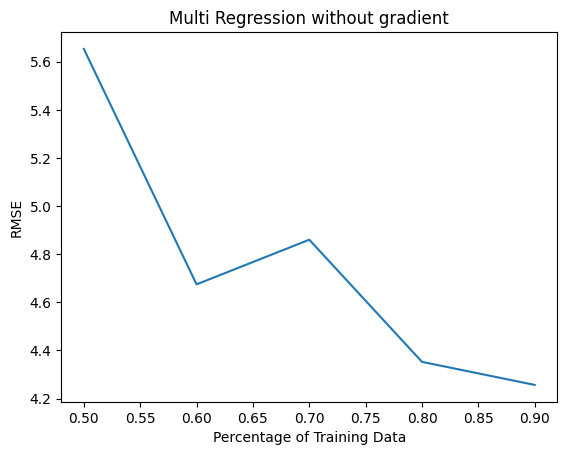

In [109]:
# Define the percentages of training data
train_percentages = [0.5, 0.6,0.7,0.8,0.9]

# Initialize an empty list to store the RMSE for each percentage
rmse_scores = []

# Loop over the percentages and fit the model
for train_percentage in train_percentages:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percentage, random_state=42)
    
    for i in range(epochs):
        y_predicted = b*X_train + b0
        b = b - lr *dldw(X_train,y_train,y_predicted)  #update weight
        b0 = b0 - lr * dldb(y_train,y_predicted) 

    y_pred = X_test*b + b0

    
    # Calculate the RMSE for this percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Plot the results
plt.plot(train_percentages, rmse_scores)
plt.xlabel('Percentage of Training Data')
plt.ylabel('RMSE')
plt.title('Multi Regression without gradient')
plt.show()